## Analyses of the Frequency_Taxonomy using NGRAMS for female emigration


The key here is to have a look at what we are getting with the track of each individual word series - by plotting (for every article that has emigration in it) the mention of the words daughters, engagement, empire, etc over time - giving them each individual lines/series in the graph, So we can see if the argument changes over time, and certain things trend at certain times.

### Loading the necessary libraries

In [77]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections

### Functions

In [5]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [132]:
def normalize_freq(publication, freq_results, view_terms):
    plt.figure(figsize=(8,8))
    normed_results = {}
    for term in view_terms:
        if term in freq_results:
            for year in freq_results[term]:
                if year>0:
                    normed_results[year] = freq_results[term][year]/float(publication[year][2])
            plt.plot(normed_results.keys(), normed_results.values(), label=term)
    
    plt.legend(loc='upper right')
    plt.xlabel("Taxonomy Terms")
    plt.ylabel("Normalized Frequency")
    plt.show()       

In [114]:
def read_query_results(filename):
    with open('./results_bl_tda/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [125]:
def plot_freq_count(freq_results, view_terms):
    plt.figure(figsize=(8,8))
    for term in view_terms:
        if term in freq_results:
            plt.plot(freq_results[term].keys(), freq_results[term].values(), label=term)
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.xlabel("Taxonomy Terms")
    plt.show()

In [116]:
def stemming(word):
    """
    Stemming is a process of reducing words to their word stem, 
    base or root form (for example, books — book, looked — look). 
    The main two algorithms are Porter stemming algorithm 
    (removes common morphological and inflexional endings from words - Used here),
     and Lancaster stemming algorithm (a more aggressive stemming algorithm). 
    :param word: Word to stemm
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """

    stemmer= PorterStemmer()
    return stemmer.stem(word)

In [117]:
def lemmatization(word):
    """
    The aim of lemmatization, like stemming, is to reduce inflectional forms to a common base form.
    As opposed to stemming, lemmatization does not simply chop off inflections. 
    Instead it uses lexical knowledge bases to get the correct base forms of words.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    lemmatizer=WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

## 1. Frequencies (without normalised them! ) results using different preprocessing treatments

### 1.a ) Preprocessing: Normalized + Stemmed
Frequency of the query results, in which each word has been normalized (lower-case and removing all characters that are not 'a',...,'z') and stemmed (reducing words to their word stem).

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

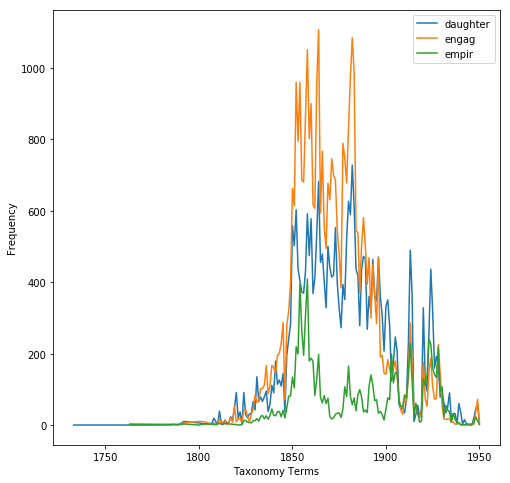

In [144]:
query_results_st=read_query_results('results_ngram_stemming')
freq_count_st=freq_count(query_results_st)
view_terms=[stemming('daughters'),stemming('engagement'),stemming('empire')]
plot_freq_count(freq_count_st, view_terms)

### 1.b) Preprocessing: Normalized + Lemmatized
Plot the frequency of the query results, in which each word has been normalized (lower-case and removing all
characters that are not 'a',...,'z') and lemmatized (reducing words to their correct base form).

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

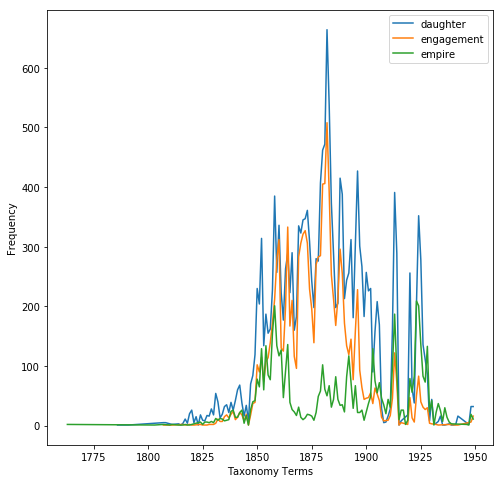

In [145]:
query_results_lem=read_query_results('results_ngram_lemmatization')
freq_count_lem=freq_count(query_results_lem)
view_terms=[lemmatization('daughters'),lemmatization('engagement'),lemmatization('empire')]
plot_freq_count(freq_count_lem, view_terms)

### 1.c) Preprocessing: Normalized 

Plot the frequency of the query results, in which each word has been normalized (lower-case and removing all
characters that are not 'a',...,'z').

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

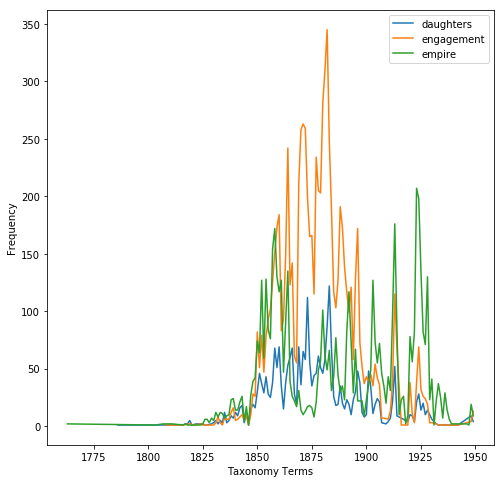

In [142]:
query_results_norm=read_query_results('results_ngram_norm')
freq_count_norm=freq_count(query_results_norm)
view_terms=['daughters','engagement','empire']
plot_freq_count(freq_count_norm, view_terms)

## 2. Normalised frequencies results using different preprocessing treatments

Here, we are examining the total number of isses, articles and words published over the period to see how much our search terms are affected by the way that the number of issues (and articles, and words!) published increases over the measurement period.

In [143]:
norm_publication=read_query_results('results_normalized')

We count the total number of words per year, and then count total instances of that search phrase per year, and plot normalised frequency on a graph (x axis is years), to see whether it is a thing that is becoming more or less popular with time

### 2.a) Plot of  normalized frequencies in which each word has been preprocessed using: normalization + stemming

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

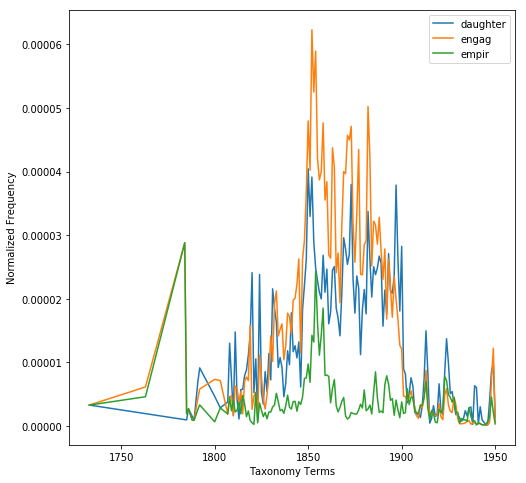

In [137]:
view_terms=[stemming('daughters'),stemming('engagement'),stemming('empire')]
normalize_freq(norm_publication, freq_count_st, view_terms)

### 2.b) Plot of normalized frequencies in which each word has been preprocessed using: normalization + lemmatization

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

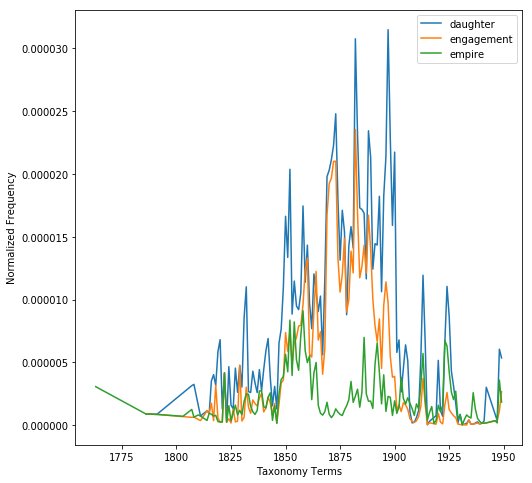

In [136]:
view_terms=[lemmatization('daughters'),lemmatization('engagement'),lemmatization('empire')]
normed_results_lem=normalize_freq(norm_publication, freq_count_lem, view_terms)

### 2.c) Plot of normalized frequencies in which each word has been preprocessed using: normalization 

**IMPORTANT!** we can use **view_terms** array to select which terms we would like to visualize over the years

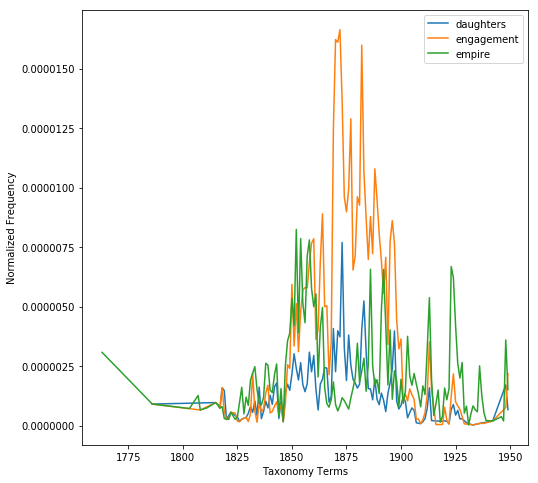

In [135]:
view_terms=['daughters','engagement','empire']
normed_results_norm=normalize_freq(norm_publication, freq_count_norm, view_terms)